In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Preliminary Results

Import the data from csv

In [2]:
fire_data <- read.csv("fire_data.csv", header = TRUE)

head(fire_data)

,Year,AnnÈe,ISO,Jurisdiction,Juridiction,Cause,Origine,Number,Data.Qualifier,Nombre,Qualificatifs.de.donnÈes
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>
1,1990,1990,AB,Alberta,Alberta,Human activity,ActivitÈs humaines,379,a,379,a
2,1990,1990,AB,Alberta,Alberta,Lightning,Foudre,971,a,971,a
3,1990,1990,AB,Alberta,Alberta,Unspecified,IndÈterminÈe,16,a,16,a
4,1990,1990,BC,British Columbia,Colombie-Britannique,Human activity,ActivitÈs humaines,1240,a,1240,a
5,1990,1990,BC,British Columbia,Colombie-Britannique,Lightning,Foudre,2015,a,2015,a
6,1990,1990,MB,Manitoba,Manitoba,Human activity,ActivitÈs humaines,283,a,283,a


The data table has 11 columns, with duplicate columns in English and French. 

We will drop the French columns as well as the Data.Qualifier column for simplicity.

In [3]:
fire_data <- fire_data %>% 
    select(Year, ISO, Jurisdiction, Cause, Number)

head(fire_data)

,Year,ISO,Jurisdiction,Cause,Number
,<int>,<chr>,<chr>,<chr>,<int>
1,1990,AB,Alberta,Human activity,379
2,1990,AB,Alberta,Lightning,971
3,1990,AB,Alberta,Unspecified,16
4,1990,BC,British Columbia,Human activity,1240
5,1990,BC,British Columbia,Lightning,2015
6,1990,MB,Manitoba,Human activity,283


We can use the `summary()` function to get summary statistics for all of the columns.

In [4]:
summary(fire_data)

      Year          ISO            Jurisdiction          Cause          
 Min.   :1990   Length:1059        Length:1059        Length:1059       
 1st Qu.:1998   Class :character   Class :character   Class :character  
 Median :2007   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2006                                                           
 3rd Qu.:2014                                                           
 Max.   :2021                                                           
                                                                        
     Number      
 Min.   :   0.0  
 1st Qu.:   8.0  
 Median :  63.0  
 Mean   : 217.5  
 3rd Qu.: 292.2  
 Max.   :2888.0  
 NA's   :9       

We can see that there are 9 NAs in the Number column. Rows containing NA can be dropped. We will also filter the data to human caused fires.

In [9]:
fire_data <- fire_data %>% 
    drop_na(Number) %>%
    filter(Cause == "Human activity")

head(fire_data)

,Year,ISO,Jurisdiction,Cause,Number
,<int>,<chr>,<chr>,<chr>,<int>
1,1990,AB,Alberta,Human activity,379
2,1990,BC,British Columbia,Human activity,1240
3,1990,MB,Manitoba,Human activity,283
4,1990,NB,New Brunswick,Human activity,318
5,1990,NL,Newfoundland and Labrador,Human activity,154
6,1990,NS,Nova Scotia,Human activity,441


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



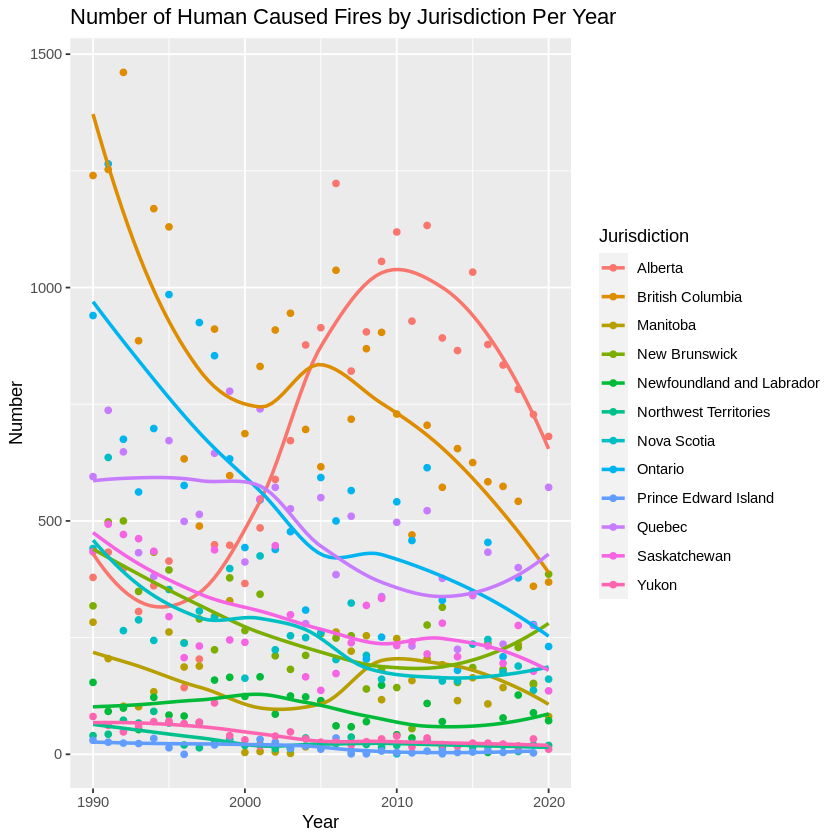

In [15]:
fire_plot <- fire_data %>%
    ggplot(aes(x = Year, y = Number, color = Jurisdiction)) + 
    geom_point() + 
    geom_smooth(se = FALSE) +
    ggtitle("Number of Human Caused Fires by Jurisdiction Per Year")

fire_plot